### Урок 3. Логистическая регрессия. Log Loss

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [78]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [79]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   

-1, -0.2, 1.3, 0.05 ...

p = [0, 1]

$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$

In [4]:
0.5 / (1 - 0.5)

1.0

In [5]:
0.01 / (1 - 0.01)

0.010101010101010102

In [6]:
0.9999 / (1 - 0.9999)

9999.0000000011

In [80]:
p = 1e-10
np.log(p / (1 - p))                       

-23.025850929840455

In [8]:
p = 0.999
np.log(p / (1 - p))

6.906754778648553

$$\vec{w}X = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\vec{p}=\frac{1}{1+\exp{(-\vec{w}X)}}$$

In [81]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [82]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [83]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

$$Logloss=-y \ln(p) - (1-y)\ln(1-p)$$

In [84]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [13]:
# Пример применения
y_true = 1
y_pred = 0.00001
calc_logloss(y_true, y_pred)

11.512925464970229

In [85]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [86]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

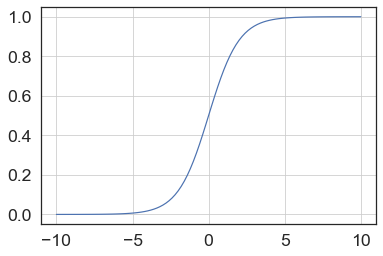

In [16]:
probabilities = sigmoid(z)
plt.plot(z, probabilities);
plt.grid();

### Logistic Regression

In [87]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [89]:
w = eval_LR_model(X_st, y, iterations=1000, alpha=1e-2)

100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453087
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099054
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.5416765996151559
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.5369841864977791
700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756572
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799
900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044184
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747


### Домашние задания

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).  
2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).
5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. Могла ли модель переобучиться? Почему?
7. *Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [95]:
w = eval_LR_model(X_st, y, iterations=1200, alpha=8)

120 [-29.74827651  -8.11721407  -0.30215396  35.04277659] 0.909014845255794
240 [-39.60233086  -3.66267097 -11.10712801  38.87587753] 6.637105187426935
360 [-47.04265146  -4.63813518 -12.76092049  38.4768974 ] 0.09285652416720672
480 [-49.57187755 -15.10407072 -11.94071646  39.36003753] nan
600 [-51.52237452  -5.08434308 -13.98572281  42.15962382] 0.08592044125839733
720 [-52.45284752  -4.98928367 -14.41278631  42.56930185] 0.08455782290249926
840 [-53.24318523  -5.04188617 -14.65193051  43.16928963] 0.08346909765147774
960 [-54.00978896  -5.10075492 -14.87645814  43.7660891 ] 0.08242946471291092
1080 [-54.75998495  -5.15838111 -15.09607462  44.35006121] 0.08143398712686548
1200 [-55.49517183  -5.21444351 -15.3115953   44.92149067] 0.0804788967648187


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


минимальный log_loss ~= 0.08047
при шаге = 8 достигается за 1200 итераций.

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).

In [96]:
def calc_pred_proba (W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [99]:
calc_pred_proba(w, X_st)

array([3.12374022e-01, 8.20770210e-04, 1.00000000e+00, 1.89513844e-02,
       9.75999750e-01, 6.38306100e-03, 1.00000000e+00, 5.26407079e-03,
       6.87789851e-01, 1.00000000e+00])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).

In [100]:
def calc_pred (W, X):
    y_pred_proba = calc_pred_proba(W,X)
    y_pred = []
                      
    for y in y_pred_proba:
        if y > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    return y_pred

y_pred = calc_pred(w, X_st)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

In [131]:
def accuracy(y, y_pred):
    return 1 / len(y)*np.sum([1 for i,y_p in enumerate(y_pred) if y_p == y[i]])

accuracy(y, y_pred)

1.0

In [208]:
# матрица ошибок
err_m = [[0,0],[0,0]]
def err_matrix(y, y_pred):
    FP = 0
    FN = 0
    TP = 0
    TN = 0
    for i, y_p in enumerate(y_pred):
        if y[i] == y_p == 1:
            TP += 1
        elif y[i] == y_p == 0:
            TN += 1
        elif y_p == 1 and y_p != y[i]:
            FP += 1
        elif y_p == 0 and y_p != y[i]:
            FN += 1
        err_m[0][0]=TP
        err_m[1][1]=TN
        err_m[1][0]=FP
        err_m[0][1]=FN
    print(f'TP: {TP}  FP: {FP} \nFN: {FN}  TN: {TN}')
            
            
err_matrix(y, y_pred)

TP: 5  FP: 0 
FN: 0  TN: 5


Precision
$$precision(a, X) = \frac{TP}{TP+FP}.$$


In [251]:
def precision(y, y_pred):
    err_matrix(y, y_pred)
    pr = err_m[0][0] / (err_m[0][0]+err_m[1][0])
    return pr
    #print(f'Precision = {pr}')

In [254]:
pr = precision(y, y_pred)
pr

TP: 5  FP: 0 
FN: 0  TN: 5


1.0

Recall
$$recall(a, X) = \frac{TP}{TP+FN},$$

In [246]:
def recall(y, y_pred):
    err_matrix(y, y_pred)
    rc = err_m[0][0] / (err_m[0][0]+err_m[0][1])
    return rc
#    print(f'Recall = {rc}')

In [255]:
rc = recall(y, y_pred)
rc

TP: 5  FP: 0 
FN: 0  TN: 5


1.0

F1-score
$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [256]:
def f1(pr,rc):
    print(f'F1-score:{(2*pr*rc)/(pr+rc)}')

In [257]:
f1(pr,rc)

F1-score:1.0


6. Могла ли модель переобучиться? Почему?

Могла. Об этом свидетельствуют accuracy, precision и recall, а также F1-score. Это могла произойти из-за малого размера датасета.

7. Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [265]:
def eval_LR_model_l1(X, y, iterations, alpha = 1e-2, lambda_ = 1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T)) + lambda_ * (w/abs(w))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [267]:
eval_LR_model_l1(X, y, 1000, lambda_=1e-2)

100 [-0.01328566 -0.01626412 -1.16222457  0.62203004] nan
200 [-3.29272986e-03 -1.42712322e-02 -2.97570478e+00  1.02287014e-03] nan
300 [-3.29272962e-03  1.37287680e-02  4.98429533e+00  1.70228704e-02] 90.50207930215569
400 [0.00670727 0.01572877 3.17429533 0.01602287] nan
500 [-0.00284923  0.01820719  1.62666174  0.01552579] nan
600 [-0.01284922 -0.0197928  -0.1833345  -0.0054742 ] nan
700 [-0.00284922 -0.0177928  -1.9933345  -0.0064742 ] nan
800 [-0.0135689  -0.01659995 -4.25124078 -0.00831975] nan
900 [0.0064311  0.01140005 3.70875922 0.00768025] nan
1000 [-0.00358034  0.01338852  1.89306527  0.0066686 ] nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([-0.00358034,  0.01338852,  1.89306527,  0.0066686 ])

In [ ]:
пробовал сделать на основе L1 из второго урока - вроде не вышло.. 